<a href="https://colab.research.google.com/github/matheusgpantoja/Inteligencia-Computacional/blob/main/Homework_1c_KNN_e_stumps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUNO: MATHEUS GABRIEL GOMES PANTOJA

MATRÍCULA: 202006840039

# 1ª Questão

Assumindo KNN com K=1

In [ ]:
import pandas as pd
import numpy as np
x_train = pd.read_csv('/content/drive/MyDrive/Datasets/estudante_202006840039_train.txt', delimiter=',').values
x_test = pd.read_csv('/content/drive/MyDrive/Datasets/estudante_202006840039_test.txt', delimiter=',').values
N_train, M = np.shape(x_train)
N_test, M = np.shape(x_test)
numberOfErrors = 0
for i in range(N_test):
    testFeatures = x_test[i, 0:2]
    minimumDistance = np.inf
    nearestNeighborIndex = -1
    for j in range(N_train):
        trainFeatures = x_train[j, 0:2]
        distance = np.sum((testFeatures - trainFeatures)**2)
        if distance < minimumDistance:
            nearestNeighborIndex = j
            minimumDistance = distance
    classifierOutput = x_train[nearestNeighborIndex, 2]
    if classifierOutput != x_test[i, 2]:
        numberOfErrors += 1
print(f'A  taxa de erro final (no conjunto de teste) para K=1 é: {numberOfErrors/N_test}')

A  taxa de erro final (no conjunto de teste) para K=1 é: 0.25


# 2ª Questão

Assumindo KNN com K=3

In [ ]:
import pandas as pd
import numpy as np
x_train = pd.read_csv('/content/drive/MyDrive/Datasets/estudante_202006840039_train.txt', delimiter=',').values
x_test = pd.read_csv('/content/drive/MyDrive/Datasets/estudante_202006840039_test.txt', delimiter=',').values
N_train, M = np.shape(x_train)
N_test, M = np.shape(x_test)
numberOfErrors = 0
for i in range(N_test):
    testFeatures = x_test[i, 0:2]
    distances = []
    for j in range(N_train):
        trainFeatures = x_train[j, 0:2]
        distance = np.sum((testFeatures - trainFeatures)**2)
        distances.append(distance)
    nearestNeighborsIndices = np.argsort(distances)[:3]
    classifierOutputs = x_train[nearestNeighborsIndices, 2]
    predictedClass = np.bincount(classifierOutputs.astype(int)).argmax()
    if predictedClass != x_test[i, 2]:
        numberOfErrors += 1
print(f'A  taxa de erro final (no conjunto de teste) para K=3 é: {numberOfErrors/N_test}')

A  taxa de erro final (no conjunto de teste) para K=3 é: 0.25


# 3ª Questão

Letra (a) e letra (b):
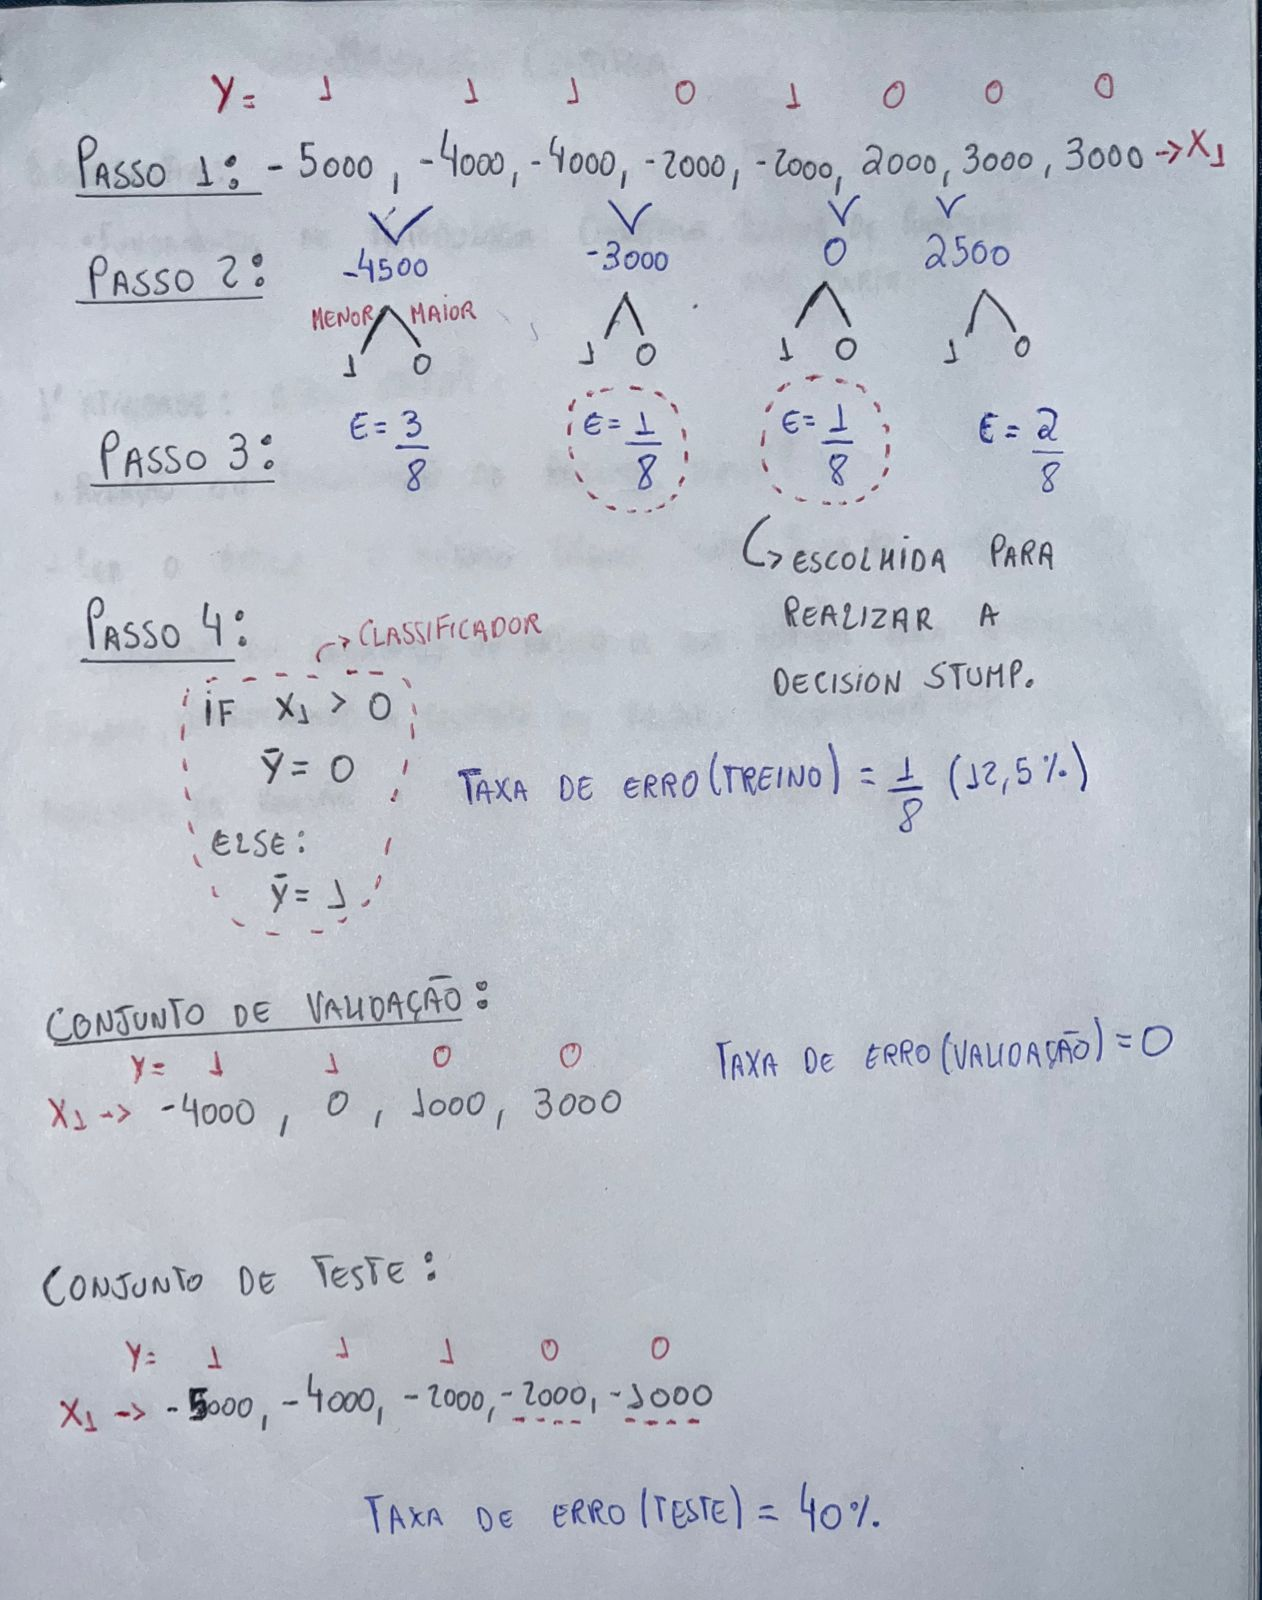

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import numpy as np
DIMENSION = 2 

print(__doc__)

def load_prova():
    my_data = np.genfromtxt('/content/drive/MyDrive/Datasets/estudante_202006840039_train.txt', delimiter=',')    
    X = my_data[:,:DIMENSION]
    y = np.ravel(my_data[:,DIMENSION:],order='C') 
    return X,y

X, y = load_prova()

print('datasets:')
print(X,y)

input_dimension = X.shape
if len(input_dimension) != 2:
    raise Exception('Input must be 2D')
num_features = input_dimension[1]
for k in range(num_features):
    print('feature', k, ', values and corresponding labels')
    sorted_indices = np.argsort(X[:,k])
    print(X[sorted_indices,k])
    print(y[sorted_indices])

decision_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1,criterion='gini')
decision_stump.fit(X, y)

print('\nThe fitted decision stump:')
r = export_text(decision_stump) 

print('correct labels=',y)
print('   predictions=',(decision_stump.predict(X)))

Automatically created module for IPython interactive environment
datasets:
[[-2.e+03 -2.e+00]
 [ 2.e+03 -1.e+00]
 [ 3.e+03 -4.e+00]
 [ 3.e+03 -3.e+00]
 [-4.e+03  0.e+00]
 [-4.e+03 -2.e+00]
 [-2.e+03 -1.e+00]
 [-5.e+03 -5.e+00]] [0. 0. 0. 0. 1. 1. 1. 1.]
feature 0 , values and corresponding labels
[-5000. -4000. -4000. -2000. -2000.  2000.  3000.  3000.]
[1. 1. 1. 0. 1. 0. 0. 0.]
feature 1 , values and corresponding labels
[-5. -4. -3. -2. -2. -1. -1.  0.]
[1. 0. 0. 0. 1. 0. 1. 1.]

The fitted decision stump:
correct labels= [0. 0. 0. 0. 1. 1. 1. 1.]
   predictions= [0. 0. 0. 0. 1. 1. 0. 1.]


O resultado encontrado por meio do código foi o mesmo resultado que obtive fazendo manualmente.

# 4ª e 5ª Questão

 Plot the classifier decision regions

datasets:
[[-2.e+03 -2.e+00]
 [ 2.e+03 -1.e+00]
 [ 3.e+03 -4.e+00]
 [ 3.e+03 -3.e+00]
 [-4.e+03  0.e+00]
 [-4.e+03 -2.e+00]
 [-2.e+03 -1.e+00]
 [-5.e+03 -5.e+00]] [0. 0. 0. 0. 1. 1. 1. 1.]
feature 0 , values and corresponding labels
[-5000. -4000. -4000. -2000. -2000.  2000.  3000.  3000.]
[1. 1. 1. 0. 1. 0. 0. 0.]
feature 1 , values and corresponding labels
[-5. -4. -3. -2. -2. -1. -1.  0.]
[1. 0. 0. 0. 1. 0. 1. 1.]

The fitted decision stump:
|--- feature_0 <= -3000.00
|   |--- class: 1.0
|--- feature_0 >  -3000.00
|   |--- class: 0.0

correct labels= [0. 0. 0. 0. 1. 1. 1. 1.]
   predictions= [0. 0. 0. 0. 1. 1. 0. 1.]


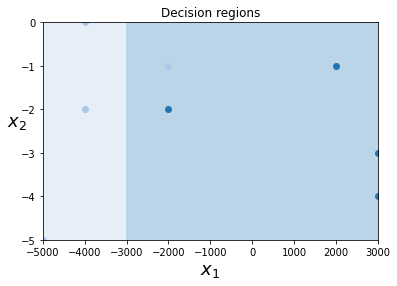

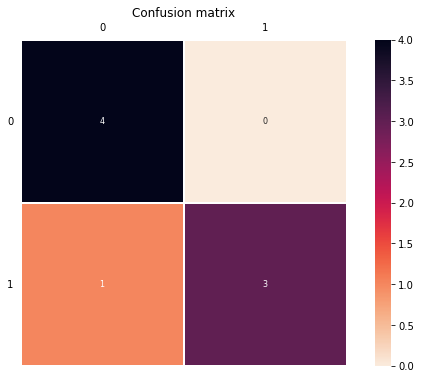

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special as sp
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import numpy as np


'''
Load dataset. You will need to change it to point to your input file.
'''
def load_prova():
    my_data = np.genfromtxt('/content/drive/MyDrive/Datasets/estudante_202006840039_train.txt', delimiter=',')        
    X = my_data[:,:2]
    y = np.ravel(my_data[:,2:],order='C') 
    return X,y

'''
Train and test decision stump.
'''
def train_test(X, y):

    print('datasets:')
    print(X,y)

    input_dimension = X.shape
    if len(input_dimension) != 2:
        raise Exception('Input must be 2D')
    num_features = input_dimension[1]
    for k in range(num_features):
        print('feature', k, ', values and corresponding labels')
        sorted_indices = np.argsort(X[:,k])
        print(X[sorted_indices,k])
        print(y[sorted_indices])

    decision_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1,criterion='gini')
    decision_stump.fit(X, y)

    print('\nThe fitted decision stump:')
    r = export_text(decision_stump) 
    print(r)

    print('correct labels=',y)
    print('   predictions=',(decision_stump.predict(X)))

    return decision_stump

'''
Plot confusion matrix.
'''
def plot_confusion_matrix(clf, X, y):
    y_pred   = clf.predict(X)
    conf_mtx = confusion_matrix(y, y_pred)

    plt.figure(figsize=(10,6))
    sns.heatmap(conf_mtx, cmap=sns.cm.rocket_r, square=True, linewidths=0.1,
                annot=True, fmt='d', annot_kws={"fontsize": 8})
    plt.tick_params(axis='both', which='major', labelsize=10,
                    bottom=False, top=False, left=False,
                    labelbottom=False, labeltop=True)
    plt.yticks(rotation=0)
    plt.title("Confusion matrix")

""" Plot the classifier decision regions
"""
def plot_decision_boundary(classifier, X, y, legend=False, plot_training=True):

    num_classes = int(np.max(y))+1 
    axes = [np.min(X[:,0]), np.max(X[:,0]),np.min(X[:,1]), np.max(X[:,1])]
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(x1.shape)

    custom_cmap = cm.get_cmap('tab20')
    colors = custom_cmap.colors[:num_classes]
    levels = np.arange(num_classes + 2) - 0.5

    plt.contourf(x1, x2, y_pred, levels=levels, colors=colors, alpha=0.3)

    if plot_training:
        for ii in range(num_classes):
            selected_indices = np.argwhere(y==ii)
            selected_indices = selected_indices.reshape((-1,))
            plt.plot(X[selected_indices, 0], X[selected_indices, 1], "o",
                     c=colors[ii], label=f'{ii}')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.title("Decision regions")
    if legend:
        plt.legend(title='Classes', bbox_to_anchor=(1, 1), loc='upper left',
                   ncol=2, handleheight=2, labelspacing=0.05, frameon=False)


if __name__ == '__main__':
    print(__doc__)
    X, y = load_prova() #load dataset
    classifier = train_test(X, y) #train decision stump
    plot_decision_boundary(classifier, X, y, legend=False, plot_training=True) #plot regions
    plot_confusion_matrix(classifier, X, y) #confusion matrix
    plt.show()

 Plot the classifier decision regions

datasets:
[[-2.e+03 -2.e+00]
 [ 2.e+03 -1.e+00]
 [ 3.e+03 -4.e+00]
 [ 3.e+03 -3.e+00]
 [-4.e+03  0.e+00]
 [-4.e+03 -2.e+00]
 [-2.e+03 -1.e+00]
 [-5.e+03 -5.e+00]] [0. 0. 0. 0. 1. 1. 1. 1.]
feature 0 , values and corresponding labels
[-5000. -4000. -4000. -2000. -2000.  2000.  3000.  3000.]
[1. 1. 1. 0. 1. 0. 0. 0.]
feature 1 , values and corresponding labels
[-5. -4. -3. -2. -2. -1. -1.  0.]
[1. 0. 0. 0. 1. 0. 1. 1.]

The fitted decision stump:
|--- feature_0 <= -3000.00
|   |--- class: 1.0
|--- feature_0 >  -3000.00
|   |--- class: 0.0

correct labels= [0. 0. 0. 0. 1. 1. 1. 1.]
   predictions= [0. 0. 0. 0. 1. 1. 0. 1.]


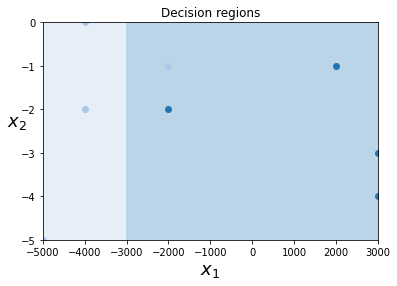

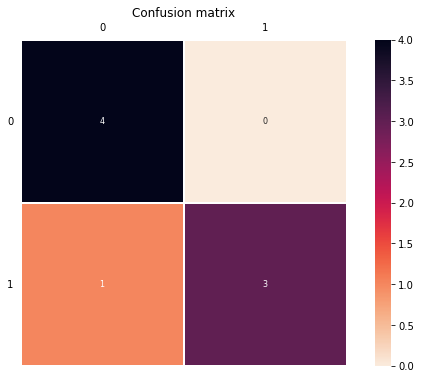

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

'''
Load dataset. You will need to change it to point to your input file.
'''
def load_prova():
    my_data = np.genfromtxt('/content/drive/MyDrive/Datasets/estudante_202006840039_train.txt', delimiter=',')        
    X = my_data[:,:2]
    y = np.ravel(my_data[:,2:],order='C') 
    return X,y

'''
Train and test decision stump.
'''
def train_decision_stump(X, y):

    print('datasets:')
    print(X,y)

    input_dimension = X.shape
    if len(input_dimension) != 2:
        raise Exception('Input must be 2D')
    num_features = input_dimension[1]
    for k in range(num_features):
        print('feature', k, ', values and corresponding labels')
        sorted_indices = np.argsort(X[:,k])
        print(X[sorted_indices,k])
        print(y[sorted_indices])

    decision_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1,criterion='gini')
    decision_stump.fit(X, y)

    print('\nThe fitted decision stump:')
    r = export_text(decision_stump) 
    print(r)

    print('correct labels=',y)
    print('   predictions=',(decision_stump.predict(X)))

    return decision_stump

'''
Train and test KNN.
'''
def train_KNN(X, y, K=3):

    print('datasets:')
    print(X,y)

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X, y)

    print('\nThe fitted KNN:')
    print('correct labels =',y)
    print('   predictions =',(knn.predict(X)))

    return knn
  
'''
Plot confusion matrix.
'''
def plot_confusion_matrix(clf, X, y):
    y_pred   = clf.predict(X)
    conf_mtx = confusion_matrix(y, y_pred)

    plt.figure(figsize=(10,6))
    sns.heatmap(conf_mtx, cmap=sns.cm.rocket_r, square=True, linewidths=0.1,
                annot=True, fmt='d', annot_kws={"fontsize": 8})
    plt.tick_params(axis='both', which='major', labelsize=10,
                    bottom=False, top=False, left=False,
                    labelbottom=False, labeltop=True)
    plt.yticks(rotation=0)
    plt.title("Confusion matrix")

""" Plot the classifier decision regions
"""
def plot_decision_boundary(classifier, X, y, legend=False, plot_training=True):

    num_classes = int(np.max(y))+1 
    axes = [np.min(X[:,0]), np.max(X[:,0]),np.min(X[:,1]), np.max(X[:,1])]
    
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = classifier.predict(X_new).reshape(x1.shape)

    
    custom_cmap = cm.get_cmap('tab20')
    colors = custom_cmap.colors[:num_classes]
    levels = np.arange(num_classes + 2) - 0.5

    plt.contourf(x1, x2, y_pred, levels=levels, colors=colors, alpha=0.3)

    if plot_training:
        for ii in range(num_classes):
            selected_indices = np.argwhere(y==ii)
            selected_indices = selected_indices.reshape((-1,))
            plt.plot(X[selected_indices, 0], X[selected_indices, 1], "o",
                     c=colors[ii], label=f'{ii}')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.title("Decision regions")
    if legend:
        plt.legend(title='Classes', bbox_to_anchor=(1, 1), loc='upper left',
                   ncol=2, handleheight=2, labelspacing=0.05, frameon=False)


if __name__ == '__main__':
    print(__doc__)
    X, y = load_prova() 
    classifier = train_test(X, y) 
    plot_decision_boundary(classifier, X, y, legend=False, plot_training=True) 
    plot_confusion_matrix(classifier, X, y) 
    plt.show()

Comparação

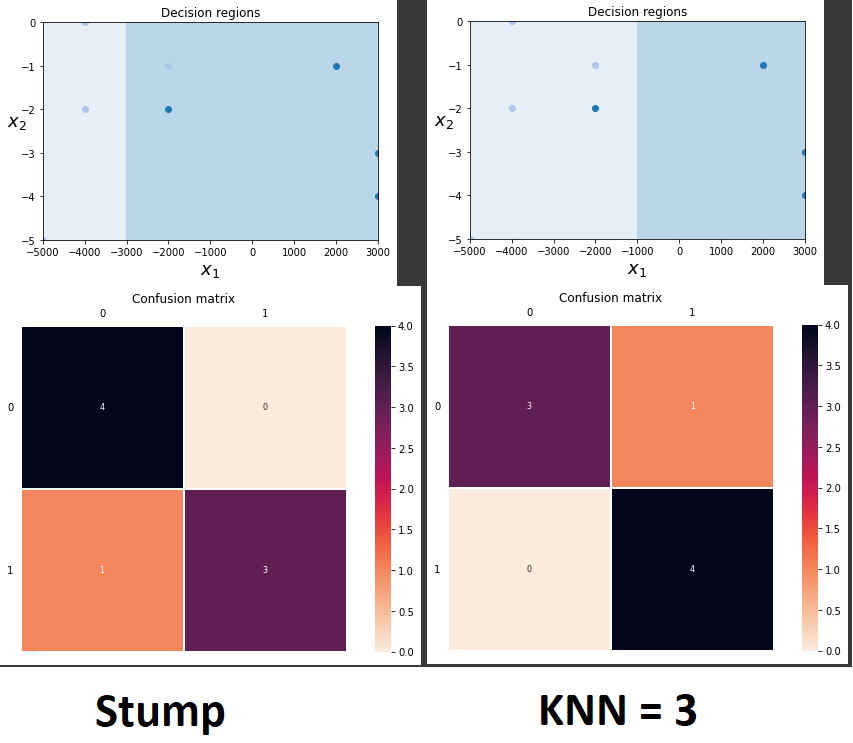

# 6ª Questão

Tanto para Decision Stump e KNN, realizar esse pré-processamento ajudaria bastante, pois o meu dataset tinha valores muito espaçados, e isso facilitaria bastante o entendimento, ou seja, melhoria meu desempenho pois conseguiria classificar mais rapidamente, e por consequência afetaria também o desempenho do KNN. 